In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, PorterStemmer, SnowballStemmer, WordNetLemmatizer

In [3]:
df = pd.read_csv("/home/phani/Downloads/Data/551982_1387024_bundle_archive/metadata.csv")
df.head()

/home/phani/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,1.14726e+07,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,1.1668e+07,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,1.1668e+07,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,1.16869e+07,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,1.16869e+07,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [4]:
df.isnull().sum()

cord_uid                 0
sha                 119577
source_x                 0
title                   56
doi                  60017
pmcid               114165
pubmed_id            82062
license                  0
abstract             58970
publish_time            17
authors               6632
journal              11586
mag_id              204823
who_covidence_id    148092
arxiv_id            202123
pdf_json_files      119577
pmc_json_files      138831
url                  45856
s2_id                28631
dtype: int64

In [6]:
#Literature source distribution
import collections
sourceDic = collections.defaultdict(int)
for s in df["source_x"][df["source_x"].notnull()]:
    sourceDic[s] += 1
sizes = []
explode = []
labels = []
for s in sourceDic:
    sizes.append(sourceDic[s])
    explode.append(0)
    labels.append(s)

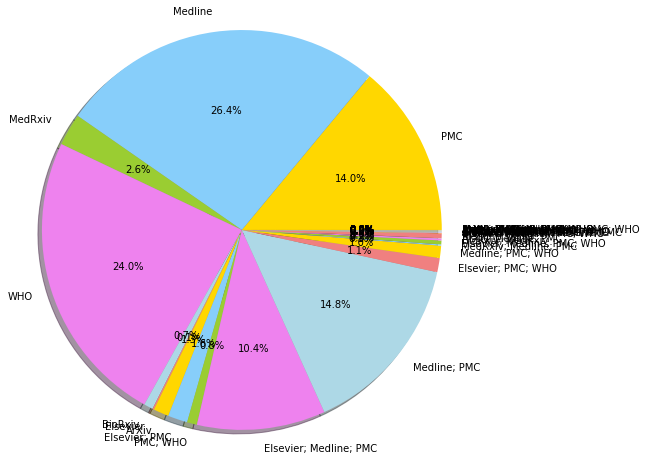

In [7]:
colors = ['gold', 'lightskyblue', 'yellowgreen', 'violet', 'lightblue', 'lightcoral']
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

In [8]:
#Publish year distribution
yearList = []
for y in df["publish_time"][df["publish_time"].notnull()]:
    yearList.append(int(re.split(' |-', y)[0]))

Text(0, 0.5, 'Frequency')

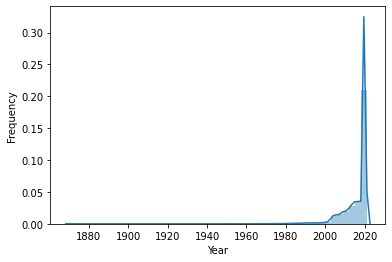

In [9]:
sns.distplot(yearList, bins = 50)
plt.xlabel("Year")
plt.ylabel("Frequency")

In [10]:
print("The number of articles with abstract: " + str(sum(df["abstract"].notnull())))

The number of articles with abstract: 145853


In [11]:
import time
from tqdm import tqdm
startTime = time.time()
absLength = []
word2count = {}
for abstract in tqdm(df["abstract"][df["abstract"].notnull()]):
    ## Remove web links
    abstract = re.sub('https?://\S+|www\.\S+', '', abstract) 
    
    ## Lowercase
    abstract = abstract.lower()
    
    ## Remove punctuation
    abstract = re.sub('<.*?>+', ' ', abstract)
   # abstract = re.sub('[%s]' % re.escape(string.punctuation), ' ', abstract)
    
    
     ## Remove number
    abstract = re.sub(r'\d+', '', abstract)
    
    ## Tokenize
    words = word_tokenize(abstract)
    
    ## Remove stop words
    nltk_stop_words = stopwords.words('english')
    words = [word for word in words if word not in nltk_stop_words]
    
    ## Stem
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words]
    
    ## Lematize verbs
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    
    ## Record length
    absLength.append(len(words))
    
    
     ## Get word count
    for word in words:
        count = word2count.get(word, 0)
        word2count[word] = count + 1
print("Time spent: " + str(round((time.time() - startTime) / 60, 3)) + "min.")
print("The number of tokens: " + str(len(word2count)))
    

100%|██████████| 145853/145853 [12:23<00:00, 196.18it/s]

Time spent: 12.392min.
The number of tokens: 255599


In [ ]:
# for abstract in tqdm(df["abstract"][df["abstract"].notnull()]):
#      ## Remove web links
#     abstract = re.sub('https?://\S+|www\.\S+', '', abstract) 

In [21]:
df1 = df[['source_x', 'abstract', 'publish_time', 'journal', 'url']]
df1.head()

,source_x,abstract,publish_time,journal,url
0,PMC,OBJECTIVE: This retrospective chart review des...,2001-07-04,BMC Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1,PMC,Inflammatory diseases of the respiratory tract...,2000-08-15,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
2,PMC,Surfactant protein-D (SP-D) participates in th...,2000-08-25,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
3,PMC,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
4,PMC,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...


In [30]:
journals = df1["journal"].value_counts(ascending=False)
top_journals=journals.head(10)
top_journals

bioRxiv                2087
BMJ                    2086
PLoS One               1933
Journal of virology    1663
Lancet                 1094
Nature                 1031
Virology                943
Surgical endoscopy      923
Emerg Infect Dis        912
J Med Virol             898
Name: journal, dtype: int64

<AxesSubplot:title={'center':'Top 10 Journals'}>

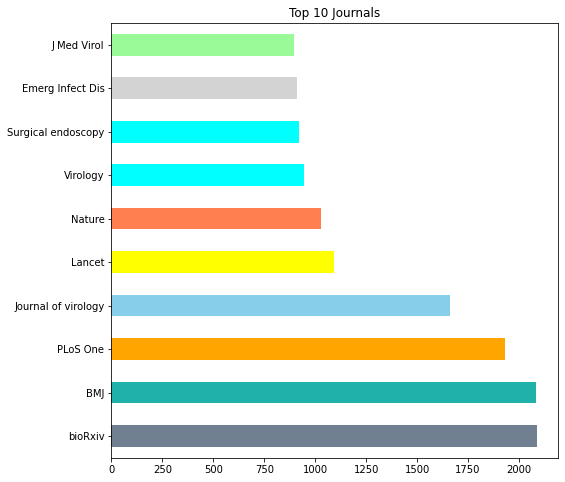

In [85]:
import matplotlib.pyplot as plt
colors = ["slategray", "lightseagreen", "orange", "skyblue", "yellow", "coral", "cyan", "aqua", "lightgray", "palegreen"]
plt.title("Top 10 Journals")
top_journals.plot(kind ='barh', color = colors, figsize = (8,8))

# What do we know about virus genetics, origin, and evolution?
# What do we know about the virus origin and management measures at the human-animal interface?

In [37]:
df1.dropna(inplace = True) 

<ipython-input-37-abc36461c9ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace = True)


In [38]:

Q1A= df1[df1['abstract'].str.contains('tracking of whole genomes')]

Q1B= df1[df1['abstract'].str.contains('geographic distribution')]

Q1C= df1[df1['abstract'].str.contains('genomic differences')]

Q1D = df1[df1['abstract'].str.contains('Nagoya Protocol')]

Q1E = df1[df1['abstract'].str.contains('Evidence that livestock ')]

Q1F = df1[df1['abstract'].str.contains('field surveillance')]

Q1G = df1[df1['abstract'].str.contains('genetic sequencing')]

Q1H = df1[df1['abstract'].str.contains('receptor binding')]

Q1I = df1[df1['abstract'].str.contains('farmers could have played a role in the origin')]

Q1J = df1[df1['abstract'].str.contains('Surveillance of mixed wildlife')]

Q1K = df1[df1['abstract'].str.contains('livestock farms for SARS-CoV-2')]

Q1L = df1[df1['abstract'].str.contains('Experimental infections')]

Q1M = df1[df1['abstract'].str.contains('Animal host')]

Q1N = df1[df1['abstract'].str.contains('risk reduction strategies')]


In [39]:
# Concatenating the dataframes into one table per question
Question1= pd.concat([Q1A, Q1B, Q1C, Q1D, Q1E, Q1F, Q1G, Q1H, Q1I, Q1J, Q1K, Q1L, Q1M, Q1N])

Question1.dropna(inplace = True) 

In [101]:
result = Question1[['publish_time', 'journal', 'url']]
result.head()

,publish_time,journal,url
657,2011-10-12,PLoS One,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1313,2013-11-26,PLoS One,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1745,2015-02-28,BMC Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
3909,2019-05-25,Viruses,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
6319,2006,Nat Rev Drug Discov,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...


In [93]:
result.shape

(633, 3)

In [94]:
print("Articles realated to the virus genetics, origin, and evolution")
print()
result.head(20)

Articles realated to the virus genetics, origin, and evolution



,publish_time,journal,url
657,2011-10-12,PLoS One,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1313,2013-11-26,PLoS One,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1745,2015-02-28,BMC Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
3909,2019-05-25,Viruses,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
6319,2006,Nat Rev Drug Discov,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
7246,1994-03-01,J Med Entomol,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
7651,2016-02-09,Disaster Med Public Health Prep,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
10550,2001-10-10,Clin Ther,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
12289,2020-07-17,Virol J,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
13488,2017-10-04,Open Forum Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...


In [95]:
journals_gentics = result['journal'].value_counts()
top_10 = journals_gentics.head(10)
top_10

bioRxiv                128
Journal of virology     55
PLoS One                17
Virology                14
Viruses                 11
PLoS Pathog              9
Nature                   8
Virol J                  6
Infect Genet Evol        6
Virus Research           6
Name: journal, dtype: int64

<AxesSubplot:title={'center':'Top 10 articles published about virus genetics, origin, and evolution'}>

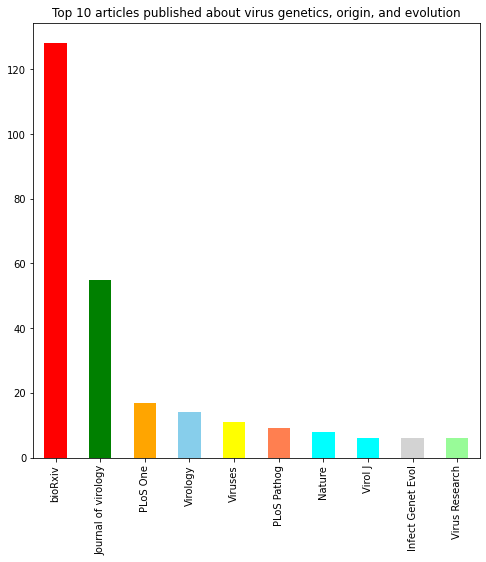

In [99]:
colors = ["red", "green", "orange", "skyblue", "yellow", "coral", "cyan", "aqua", "lightgray", "palegreen"]
plt.title("Top 10 articles published about virus genetics, origin, and evolution")
top_10.plot(kind='bar',figsize=(8,8), color = colors)